In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pypsa

plt.style.use(["bmh", "../../matplotlibrc"])
sns.set_palette("colorblind")

import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 100

import yaml
with open('../../config/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [76]:
voll = pypsa.Network("../../results/20240506-num-years/network_solved_LT-country+DE-number_years+70-voll+true.nc")
pwl = pypsa.Network("../../results/20240506-num-years/network_solved_LT-country+DE-number_years+70-elastic_pwl+default.nc")


INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+70-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+70-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores


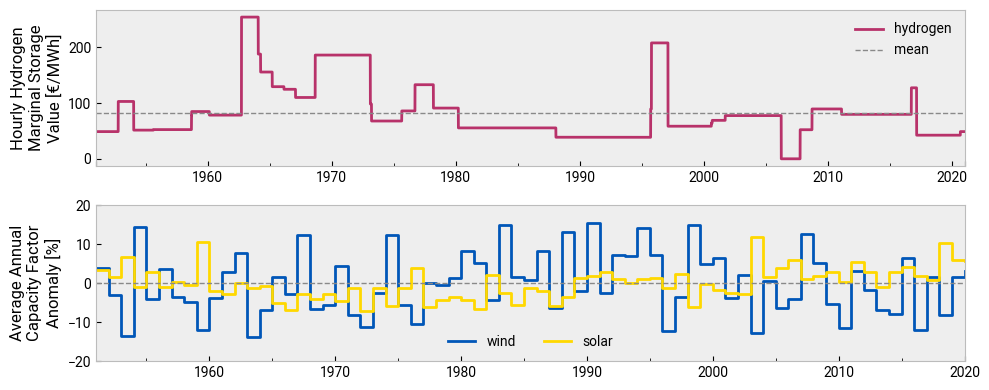

In [122]:
fig, ax = plt.subplots(2, 1, figsize=(10,4))
msv = pwl.buses_t.marginal_price["hydrogen"]
msv.plot(ax=ax[0], color=config["colors"]["hydrogen"])

cf = pwl.generators_t.p_max_pu.loc[:,::-1]
deviation = (cf.resample("YE").mean() - cf.mean()) / cf.mean() * 100

ax[0].axhline(msv.mean(), color="#898989", linestyle="--", linewidth=1, label='mean')
ax[0].legend()

deviation.plot(ax=ax[1], drawstyle="steps-post", color=config["colors"])
ax[0].set_ylabel("Hourly Hydrogen\nMarginal Storage\nValue [€/MWh]")
ax[1].set_ylabel("Average Annual\nCapacity Factor\nAnomaly [%]")
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[1].set_ylim(-20, 20)
ax[1].axhline(0, color="#898989", linestyle="--", linewidth=1)
plt.legend(title="", ncol=2)

for ext in ["pdf", "png"]:
    plt.savefig(f"../../figures/figure-msv-cf.{ext}", bbox_inches="tight", dpi=300)